Stage 1024  LR  score: 100%|██████████| 2000/2000 [04:56<00:00,  6.76it/s, psnr=37.972, ssim=0.882]


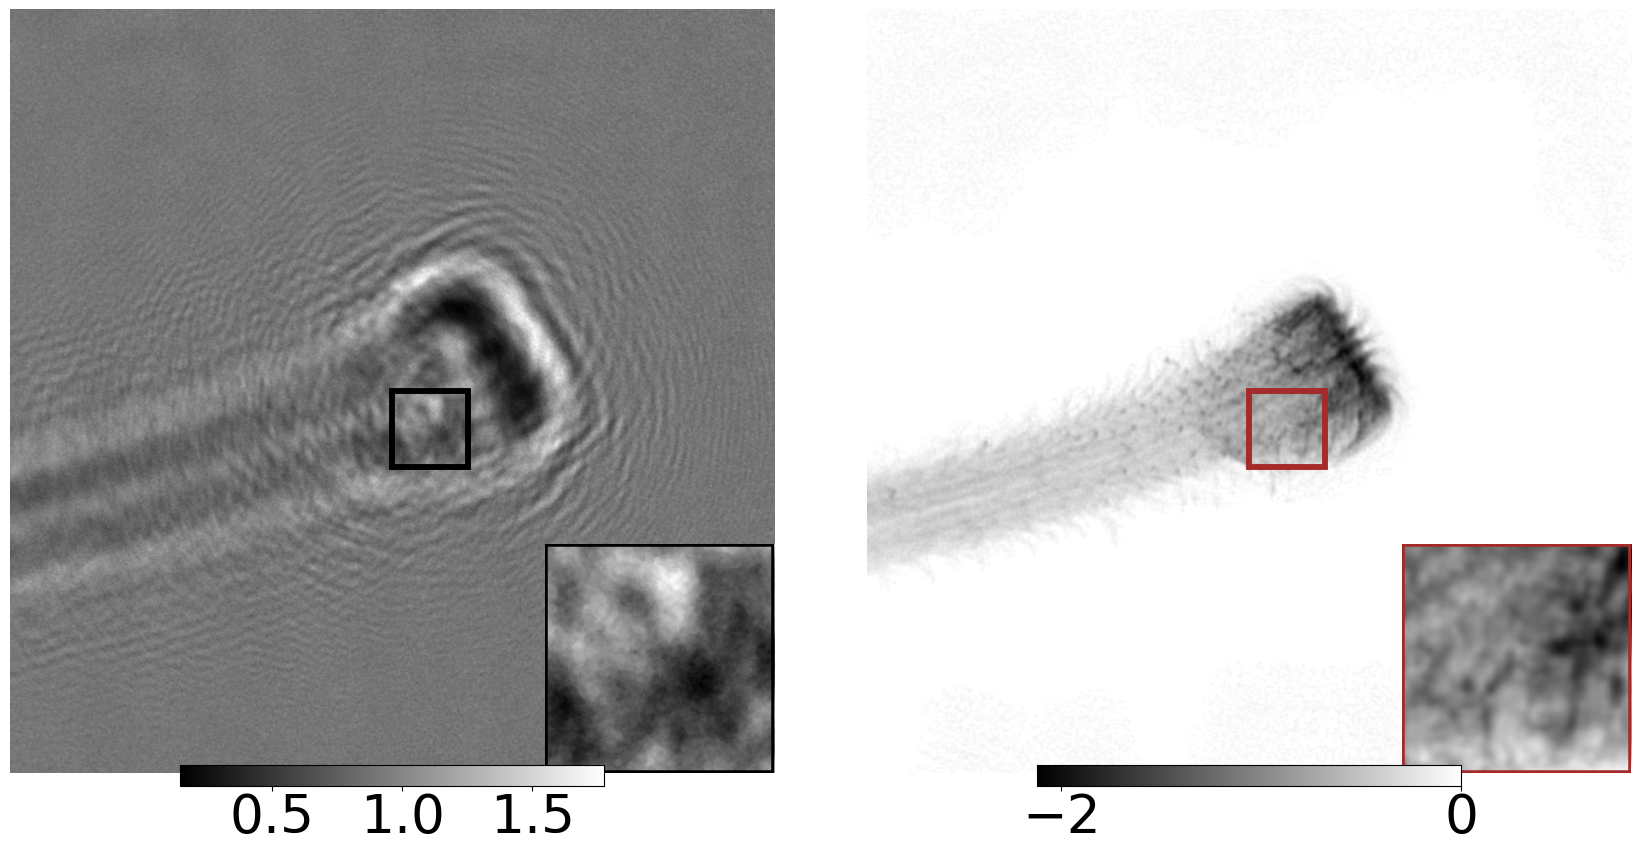

In [ ]:
from init_lib import *
idx = [30*i for i in range(1)]
spider = experiments.spider_jdora(abs_ratio = 5.4e-4, positive_phase = 'relu_inverted', positive_attenuation = 'relu', conv_num = 32, transform_type = 'reshape', model_type = 'unet', dis_depth = 2, mode = 'reflect', pad_times = 0, g_learning_rate = 1e-3, d_learning_rate = 1e-4, dsf = 2)
# visualize([spider['image']], cmap = 'gray', colorbar = True, colorbar_normalize = True, axis = 'off', title = 'no_title', colorbar_location = 'right',  vmode = 'zoom', zoomout_location = 'bottom right')
model = solver(**spider)
model.train(iter_num = 5)
model.train(iter_num = 500)
model.g_learning_rate = 1e-4
model.train(iter_num = 500)
model.g_learning_rate = 1e-5
model.train(iter_num = 1000)
visualize([model.transformed_images[:,:,4:-4, 4:-4], model.phase_list[-1][4:-4, 4:-4]], cmap = 'gray', colorbar = True, colorbar_normalize = False, axis = 'off', title = 'no_title', colorbar_location = 'bottom',  vmode = 'zoom', zoomout_location = 'bottom right', zoomout_position = 'left')
# visualize([model.phase_list[-1]], cmap = 'gray', colorbar = True, colorbar_normalize = True, axis = 'off', title = 'no_title', colorbar_location = 'right',  vmode = 'zoom', zoomout_location = 'bottom right', zoomout_position = 'left')


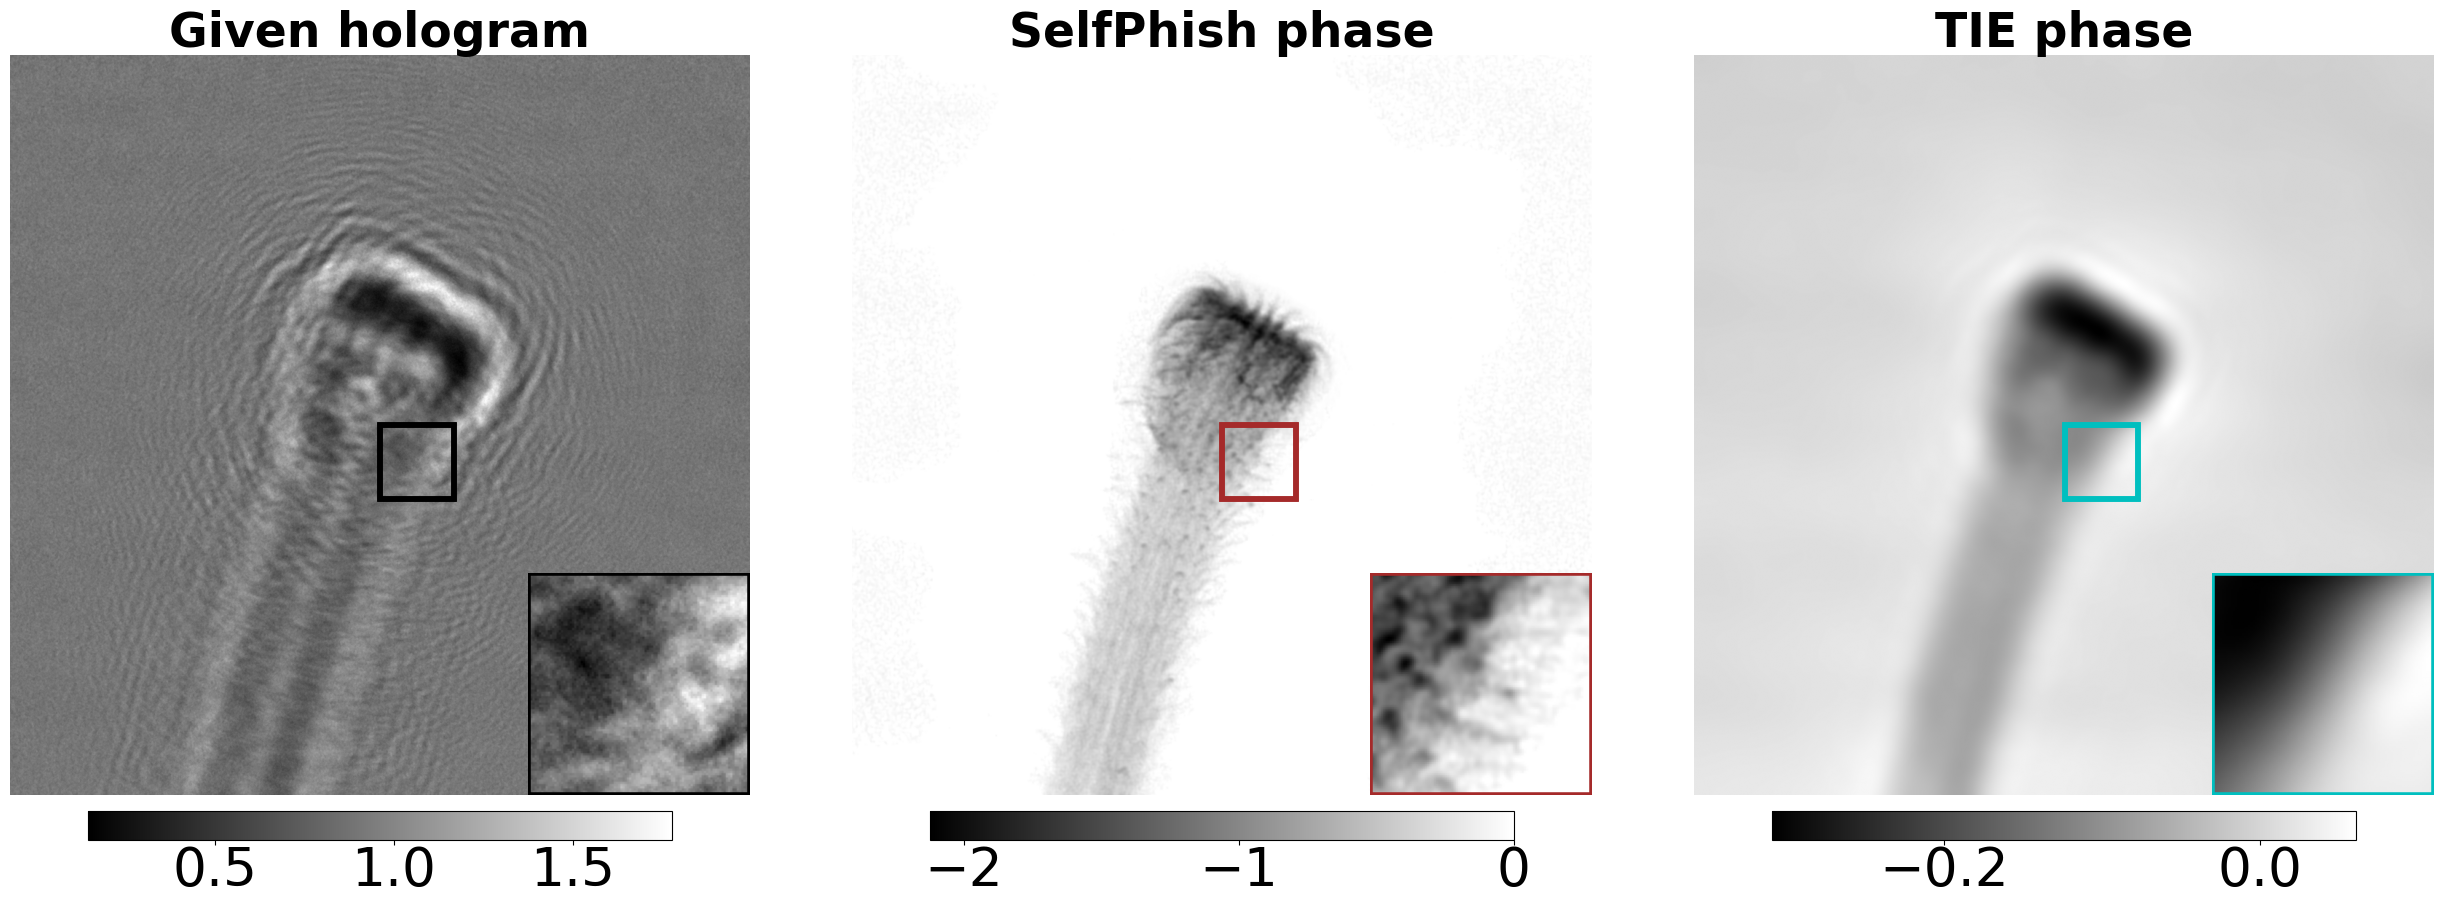

In [ ]:
paganin_phase = io.imread('/data/hereon/wp/group/phase/spider_hair/phase_tie_regpar1p4_bin2.tif')
visualize([np.flip(np.transpose(tensor_to_np(model.transformed_images[:,:,4:-4, 4:-4]))), 
		   np.flip(np.transpose(model.phase_list[-1][4:-4, 4:-4])), 
		   np.fliplr(paganin_phase[4:-4, 4:-4])], title=['Given hologram', 'SelfPhish phase', 'TIE phase'], 
			cmap='gray',images_per_row = 4, vmode = 'zoom',  axis = 'off', colorbar = True, colorbar_location = 'bottom', axin_axis = False, 
			fontsize = 40, label_size = 30, min_max = False, move_hs = [-0.21,0.06,0.2], move_vs = [-0.08, 0.23, -0.1], title_fontsize = 34, pad = 0.02, shrink = 0.7,
		  zoomout_location='bottom right', zoomout_position='left')

# Make video

In [ ]:
vid_phases = [model.phase_list[i] for i in range(0,400,10)]
vid_phases = resize_with_diff_interpolation(vid_phases, (512,512), interpolation='nearest')

create_gif_with_progress_profile_text(vid_phases, '../data/spider/reconstructed/spider_hair_best.gif', duration = 10.5, loop = 0, add_profile = False)

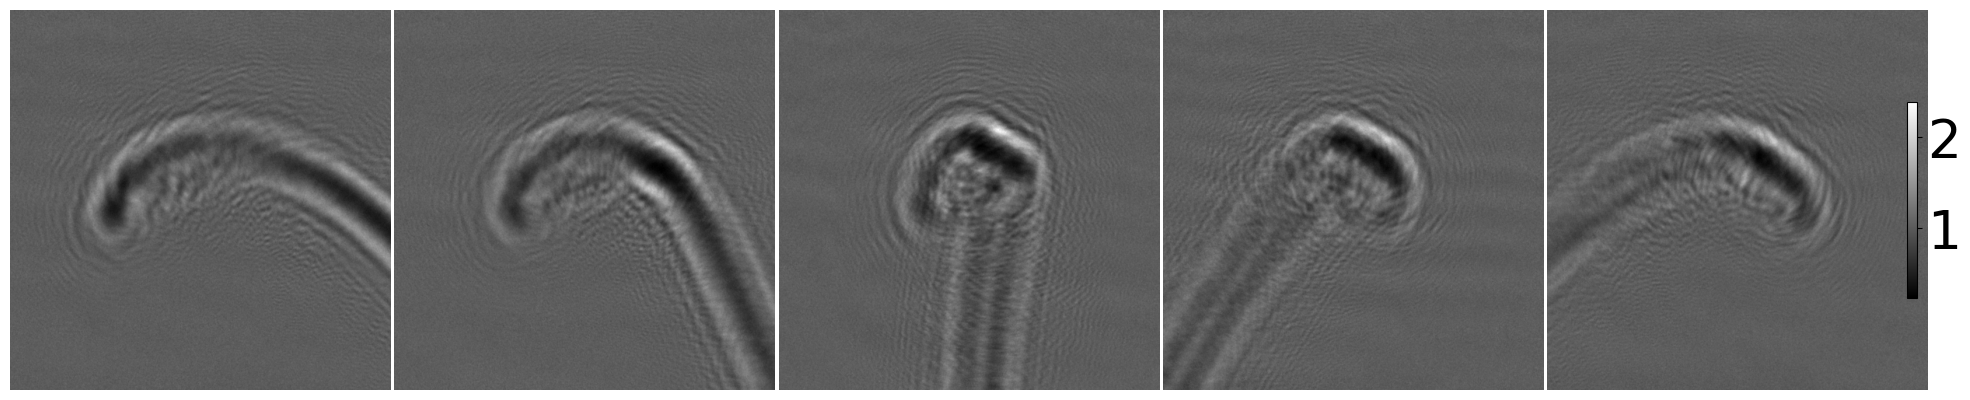

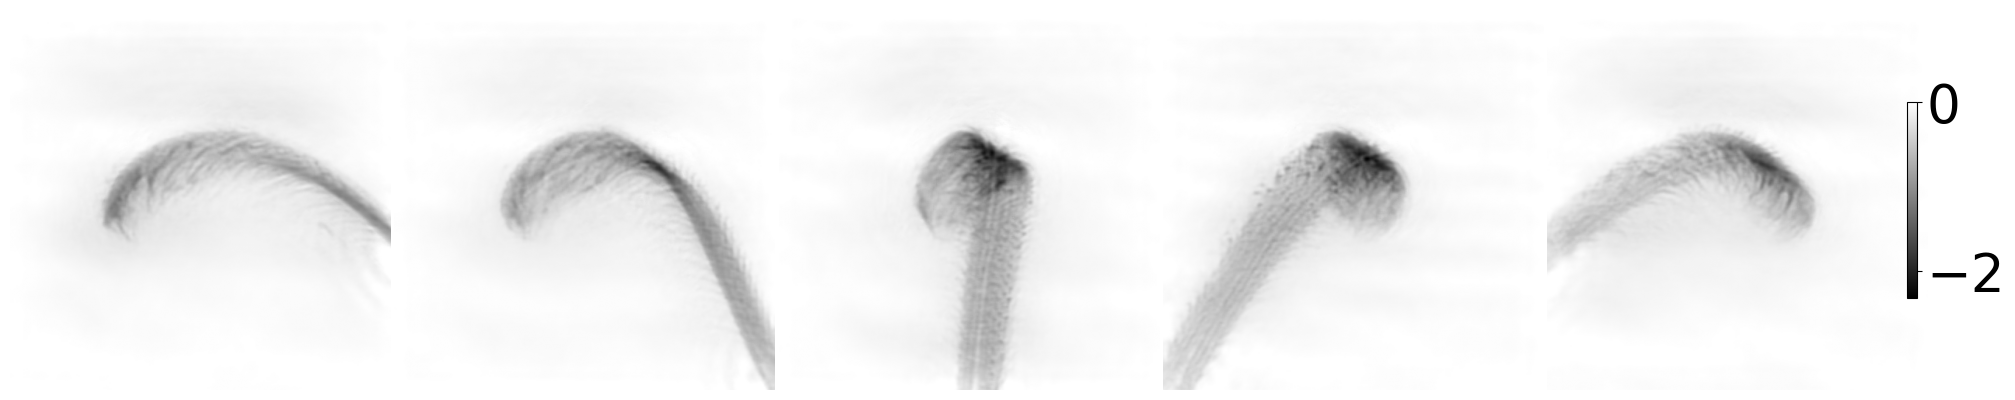

In [11]:
visualize([model.phase_list[-1][i][10:500,10:500] for i in range(len(model.phase_list[-2]))], cmap = 'gray', colorbar = True, colorbar_normalize = True, axis = 'off', title = 'no_title', colorbar_location = 'right')
visualize([model.phase_list[-2][i][10:500,10:500] for i in range(len(model.phase_list[-2]))], cmap = 'gray', colorbar = True, colorbar_normalize = True, axis = 'off', title = 'no_title', colorbar_location = 'right')